In [1]:
import tensorflow as tf
from google.colab import drive
from google.colab import files
import os
import cv2
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath=os.listdir('drive/MyDrive/LPC')
for sub in filepath:
  print(sub)

Person 9
Person 8
Person 5
Person 4
Person 2
Person 10
Person 6
Person 3
Person 7
Person 1


In [3]:
train_dir='drive/MyDrive/LPC'
training_data=[]

In [4]:
def create_trainingdata():
    categories=os.listdir(train_dir)
    for sub in categories:
        path=os.path.join(train_dir,sub)
        class_num=categories.index(sub)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(250,250))
            training_data.append([new_array,class_num])

In [5]:
create_trainingdata()

In [6]:
random.shuffle(training_data)

In [7]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)

X=np.array(X).reshape(-1,250,250,3)
Y=np.array(Y).reshape(-1,1)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [13]:
cnn=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(250,250,3)),
        tf.keras.layers.MaxPooling2D(2,2),
      
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
        ])

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])   

In [14]:
model1=cnn.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
176/176 [==============================] - 28s 157ms/step - loss: 4.1469 - accuracy: 0.2196 - val_loss: 1.7105 - val_accuracy: 0.3637
Epoch 2/50
176/176 [==============================] - 27s 153ms/step - loss: 1.5607 - accuracy: 0.4109 - val_loss: 1.0163 - val_accuracy: 0.5277
Epoch 3/50
176/176 [==============================] - 27s 151ms/step - loss: 1.0273 - accuracy: 0.5435 - val_loss: 0.9082 - val_accuracy: 0.6347
Epoch 4/50
176/176 [==============================] - 27s 152ms/step - loss: 0.9495 - accuracy: 0.5717 - val_loss: 0.8737 - val_accuracy: 0.6203
Epoch 5/50
176/176 [==============================] - 27s 153ms/step - loss: 0.9087 - accuracy: 0.6076 - val_loss: 0.7850 - val_accuracy: 0.6565
Epoch 6/50
176/176 [==============================] - 27s 152ms/step - loss: 0.8588 - accuracy: 0.6353 - val_loss: 0.7215 - val_accuracy: 0.6954
Epoch 7/50
176/176 [==============================] - 27s 152ms/step - loss: 0.8129 - accuracy: 0.6653 - val_loss: 0.7072 - val_ac

In [15]:
cnn.save("CNNLPC.h5")

In [28]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

59/59 [==============================] - 3s 54ms/step - loss: 0.1469 - accuracy: 0.9563


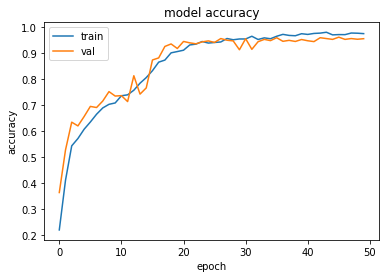

In [17]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

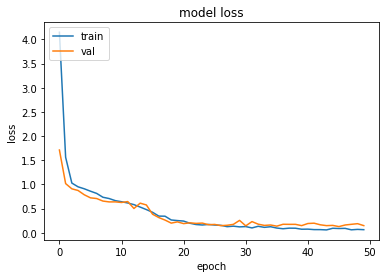

In [18]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
model_pred=cnn.predict(x_test)
model_pred=np.argmax(model_pred[:75],axis=1)
actual=y_test[:75].reshape(-1)

print("Prediction:")
print(model_pred)
print("Actual :")
print(actual)

Prediction:
[2 2 7 3 1 2 1 7 1 3 3 6 1 9 5 0 2 5 5 6 7 5 2 6 6 9 0 9 6 4 1 5 2 1 1 3 8
 0 7 2 7 6 2 1 9 0 7 0 9 0 3 9 2 2 8 8 1 7 3 0 5 0 8 8 8 4 8 4 4 4 7 3 6 6
 3]
Actual :
[2 2 7 3 1 2 1 7 1 3 3 6 1 9 5 0 2 5 5 6 7 5 2 6 6 9 0 9 6 4 1 5 2 1 1 3 8
 0 7 2 7 6 2 1 9 0 7 0 9 0 3 9 2 2 8 8 1 7 3 0 5 0 8 8 8 4 8 4 4 4 7 3 6 6
 3]
